**Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True) 

Mounted at /content/drive


**Import the Required Packages**

In [ ]:
import numpy as np
import pandas as pd
import functools, operator

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from seaborn import heatmap
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit as SSS
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import TruncatedSVD
import joblib
from progressbar import ProgressBar

import matplotlib.pyplot as plt
from matplotlib import style
from seaborn import heatmap, kdeplot
import warnings
warnings.filterwarnings("ignore")
import os
import pickle

import numpy as np
import pandas as pd
from sklearn import metrics
# -- import mlfuncs_clfn.py

import matplotlib.pyplot as plt
from matplotlib import style
from seaborn import heatmap
plt.style.use('seaborn-whitegrid')

In [ ]:
data_path = '/content/drive/MyDrive/Project AI ML/Data/' 

# mlfuncs_clfn.py location (can be same as data_path if desired):
ml_funcs_path = '/content/drive/MyDrive/Project AI ML/mlfuncs/'  

In [ ]:
def fn_append_path(path_):  
    
    import sys
    import os

    #py_file_location = "/content/" + path_
    sys.path.append(os.path.abspath(path_))


fn_append_path(ml_funcs_path)

In [ ]:
ml_funcs_path

'/content/drive/MyDrive/Project AI ML/mlfuncs/'

In [ ]:
import mlfuncs_clfn as ml 

**Binary Classification**

**Read the Dataset**

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/Project AI ML/Data/train_data.pkl")

In [ ]:
df = df.drop(columns = ['record', 'type'], axis = 1)

- Drop the Useless Columns in dataset which are record and type

In [ ]:
df.head()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,class
0,76.0,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41.0,18.0,66.0,...,2.0,18.0,22.0,2.0,0.025930,0.025930,0.025930,0.025436,0.025436,0
1,313.0,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21.0,4.0,33.0,...,26.0,27.0,62.0,9.0,-0.042009,-0.029498,0.005012,0.030892,0.002986,0
2,315.0,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22.0,3.0,32.0,...,3.0,8.0,12.0,1.0,0.009528,0.009528,0.008786,0.008786,0.008368,0
3,321.0,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22.0,4.0,33.0,...,6.0,9.0,16.0,1.0,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555,0
4,336.0,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11.0,4.0,16.0,...,16.0,5.0,31.0,10.0,0.016053,0.006742,0.002782,-0.007798,-0.051155,0


**Split and Standardize the Data**

- Splitting the Dataset into train, eval, test datasets with ratios of 60,20,20 respectively.
- Standardize the each feature of datasets
- Store the mean and standard deviation of each features to use at deployment phase.

In [ ]:
df_tr, df_eval, df_ts = ml.fn_tr_eval_ts_split_clf(df, eval_size = 0.2, ts_size = 0.2)


In [ ]:
df_ts.to_csv('/content/drive/MyDrive/Project AI ML/Data/df_ts.csv',index = False)

In [ ]:
df_ts.head()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,class
483572,218.0,216.0,0.026685,0.384443,-0.311428,-0.432238,-0.311428,3.0,10.0,35.0,...,2.000000,17.000000,36.00000,17.000000,-0.246757,-0.246757,-0.246757,-0.243830,-0.243830,0
716321,370.0,242.0,0.093972,0.830077,0.126090,0.126090,0.032217,17.0,17.0,43.0,...,8.544203,8.438393,27.73065,10.748054,-0.199531,-0.207508,-0.215008,-0.231296,-0.355406,0
505160,180.0,180.0,0.035381,0.258804,-0.005562,-0.005562,-0.056172,18.0,11.0,43.0,...,5.000000,16.000000,42.00000,21.000000,-0.176311,-0.251828,-0.331500,-0.401206,-0.448624,0
654791,322.0,232.0,0.155244,1.118056,-0.002836,-0.002836,-0.086806,11.0,18.0,44.0,...,8.544203,8.438393,27.73065,10.748054,-0.199531,-0.207508,-0.215008,-0.231296,-0.355406,0
651724,54.0,148.0,0.402879,-0.715611,1.471861,-0.996358,-0.118299,43.0,19.0,68.0,...,8.544203,8.438393,27.73065,10.748054,-0.199531,-0.207508,-0.215008,-0.231296,-0.355406,0


In [ ]:
df_tr, df_eval, df_ts, std_transformer = ml.fn_standardize_df(df_tr, to_transform = [df_eval, df_ts])

In [ ]:
df_tr.iloc[:,2:].columns

Index(['0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval',
       '0_pq_interval', '0_qt_interval', '0_st_interval', '0_qrs_morph0',
       '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4',
       '1_pre-RR', '1_post-RR', '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak',
       '1_qPeak', '1_qrs_interval', '1_pq_interval', '1_qt_interval',
       '1_st_interval', '1_qrs_morph0', '1_qrs_morph1', '1_qrs_morph2',
       '1_qrs_morph3', '1_qrs_morph4', 'labels'],
      dtype='object')

In [ ]:
df_tr, df_eval, df_ts = df_tr.dropna(), df_eval.dropna(), df_ts.dropna()

df_tr.shape, df_eval.shape, df_ts.shape

((532462, 33), (177487, 33), (177488, 33))

In [ ]:
df_ts.head()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,labels
0,0.212256,0.187826,-0.167731,-0.081473,-1.107931,-0.084314,-0.677116,-1.071537,0.017774,-0.287466,...,-0.772422,1.407103,0.640079,1.006748,-0.203210,-0.174848,-0.123439,-0.066691,0.239823,0
1,2.119722,0.513965,0.189846,0.597796,-0.528674,0.719158,0.574984,-0.063360,0.757378,-0.058456,...,-0.024255,0.085002,0.052674,0.060998,-0.013444,-0.025272,-0.032542,-0.037662,-0.023723,0
2,-0.264611,-0.263751,-0.121518,-0.272980,-0.702976,0.529703,0.252933,0.008652,0.123432,-0.058456,...,-0.429447,1.252681,1.066284,1.611840,0.079856,-0.194171,-0.366053,-0.431164,-0.243910,0
3,1.517364,0.388527,0.515452,1.036756,-0.699368,0.533625,0.141315,-0.495436,0.863036,-0.029830,...,-0.024255,0.085002,0.052674,0.060998,-0.013444,-0.025272,-0.032542,-0.037662,-0.023723,0
4,-1.845801,-0.665153,1.831423,-1.758256,1.253075,-0.896120,0.026565,1.808968,0.968694,0.657200,...,-0.024255,0.085002,0.052674,0.060998,-0.013444,-0.025272,-0.032542,-0.037662,-0.023723,0


In [ ]:
std_transformer.mean_.shape, std_transformer.var_.shape

((32,), (32,))

In [ ]:
df_mean_std = pd.DataFrame().assign(means = std_transformer.mean_, std = std_transformer.var_**0.5)
df_mean_std

,means,std
0,201.086025,79.686840
1,201.026406,79.720602
2,0.058248,0.188176
3,0.437893,0.656050
4,0.525402,0.755309
5,-0.373649,0.694895
6,-0.125590,0.274454
7,17.879851,13.886457
8,9.831774,9.464526
9,45.042054,34.932978


In [ ]:
df_mean_std.to_csv('/content/drive/MyDrive/Project AI ML/Data/df_mean_std.csv', index=False)

**Distribution of Binary Classes**

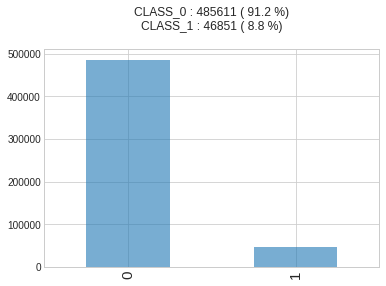

In [ ]:
y_tr = df_tr.iloc[:,-1].values

ml.fn_distr_labels_clf(y_tr)

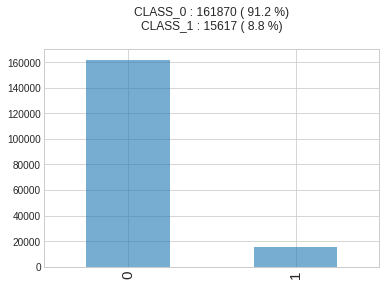

In [ ]:
y_eval = df_eval.iloc[:, -1].values

ml.fn_distr_labels_clf(y_eval)

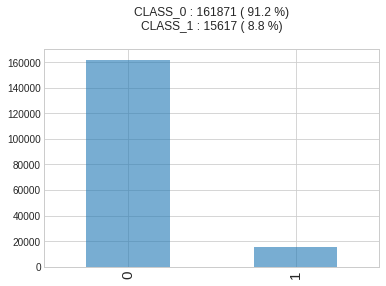

In [ ]:
y_ts = df_ts.iloc[:, -1].values

ml.fn_distr_labels_clf(y_ts)

- From the above plots, It is clear that all train, eval, test datasets are imbalanced datasets.
- Imbalanced datasets is typical problem, where our model tends towards majority class.
- So, we should handle it to by giving less weightage to majority class and more weight to minority class.

**Feature Selection**

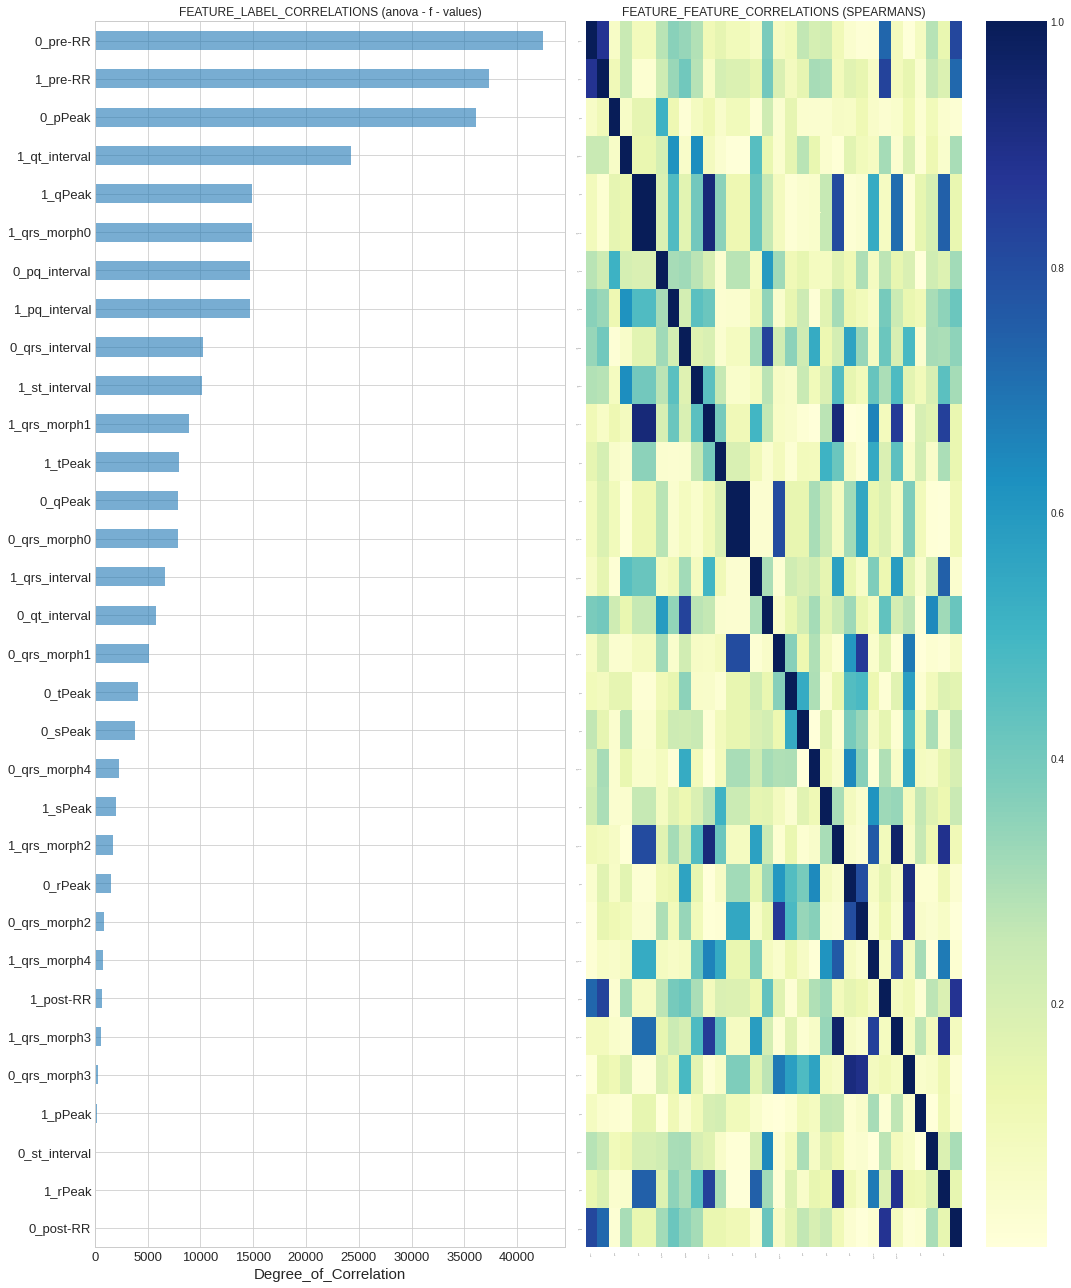

(32, 32)

In [ ]:
f_ratios, df_corr, best_feats = ml.fn_feat_select_clfn(df_tr, 
                                                    thresh_feat_label = None, 
                                                    thresh_feat_feat =  None,
                                                    figsize = (15, 18))

df_corr.shape

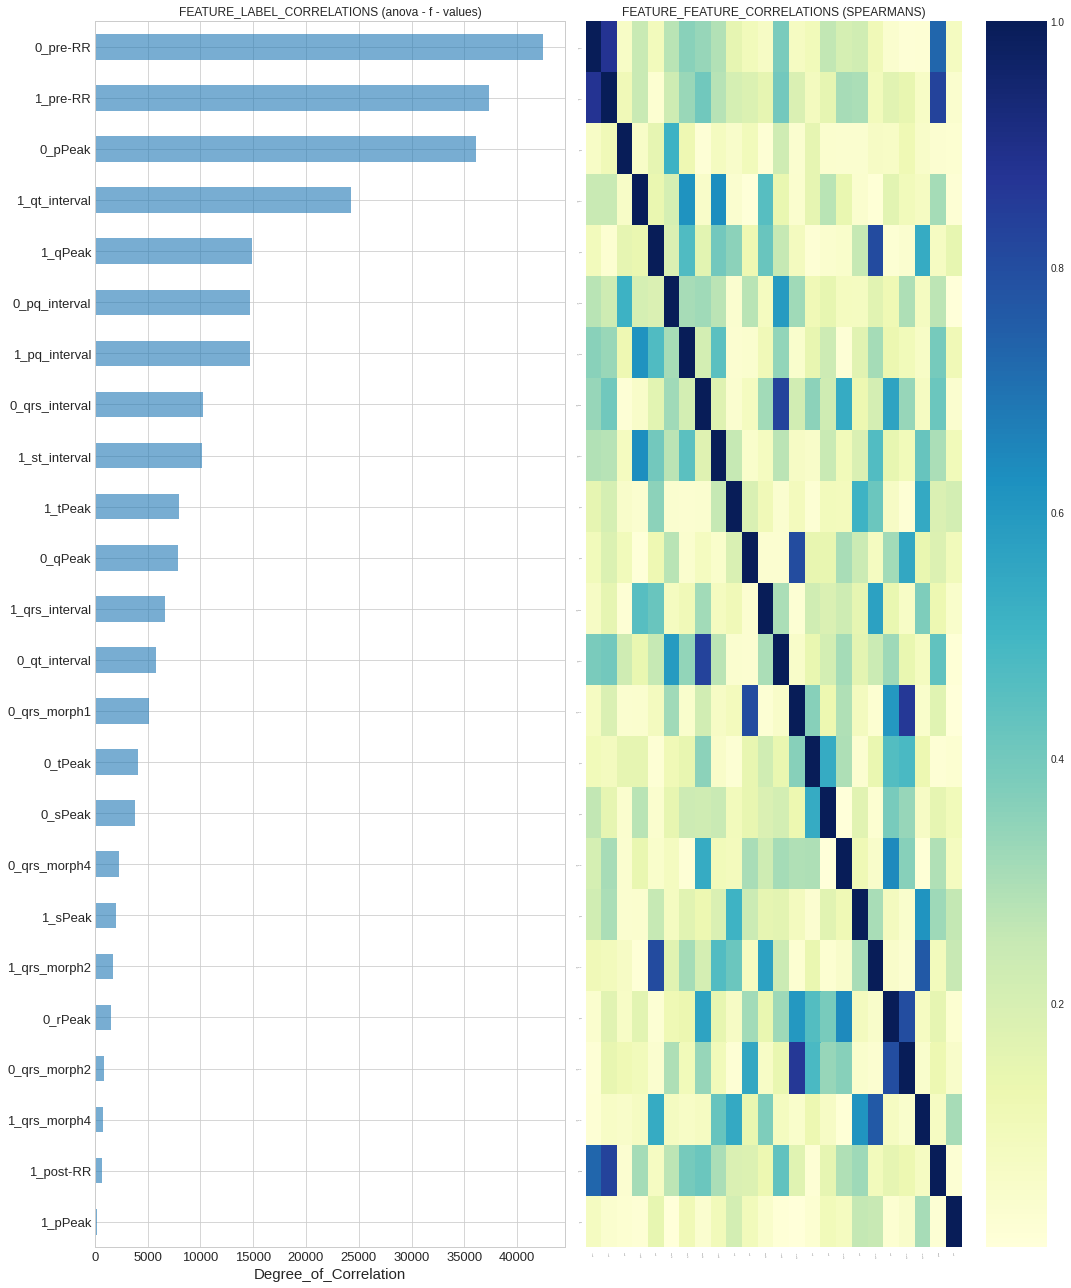

In [ ]:
f_ratios, df_corr, best_feats2 = ml.fn_feat_select_clfn(df_tr, 
                                                    thresh_feat_label = 50, 
                                                    thresh_feat_feat =  0.90,
                                                    figsize = (15, 18))


In [ ]:
pickle.dump(best_feats2, open("/content/drive/MyDrive/Project AI ML/Data/best_features.pkl","wb"))

In [ ]:
df_tr = df_tr.loc[:, best_feats2].assign(labels = y_tr)
df_eval = df_eval.loc[:, best_feats2].assign(labels = y_eval)
df_ts = df_ts.loc[:, best_feats2].assign(labels = y_ts)

- In the above plot, we have seen the feature feature correlation plot and feature label correlation plot using f-ratios.
- I have taken threshold value for feature-label as 50
- I have taken threshold value for feature-feature correlation as 0.90
- Then after, Select only best features which has crossed the threshold values. Hence, Feature Selection is done.

**Distribution of Top 4 features**

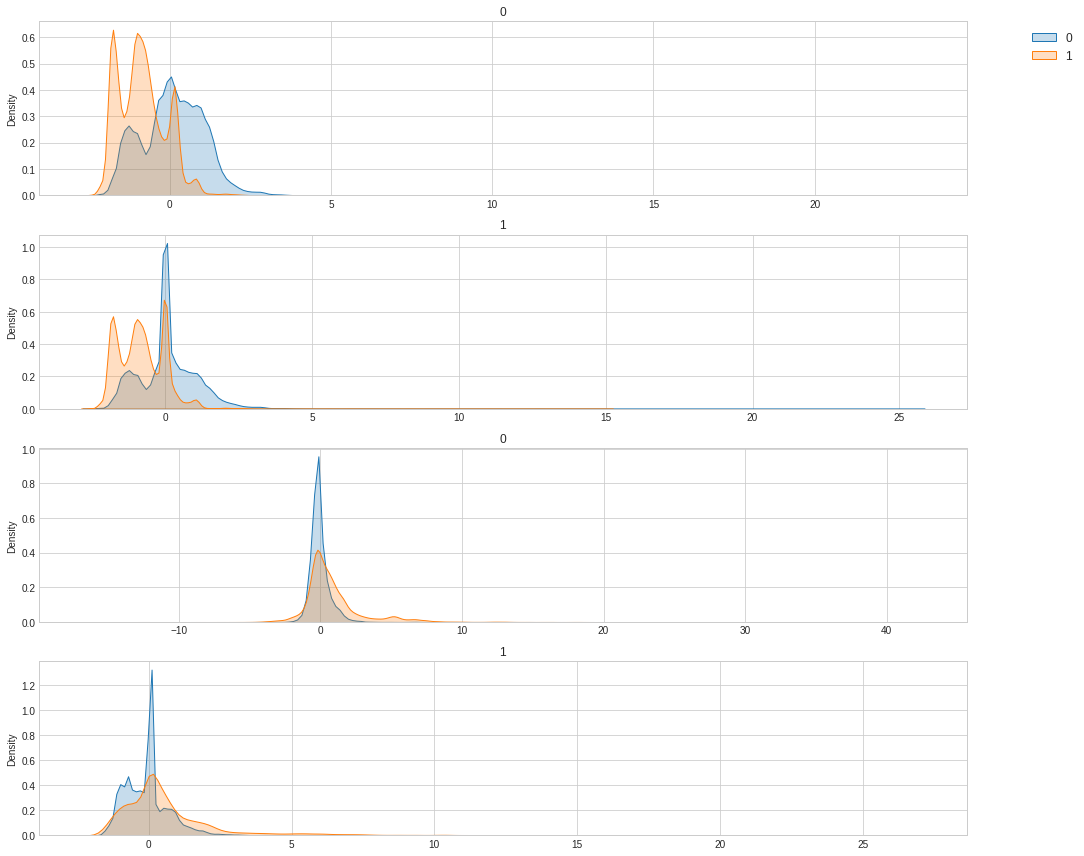

In [ ]:
df_feat_stats = ml.fn_distr_feats_labels(df_tr, n_top_feats = 4, figsize = (15, 12))

- From these distributions, It is clear that we can't make any simple decision based model so that two defined classes on dataset can be classified.
- So, It is better to work on multiple features to work out or classify.

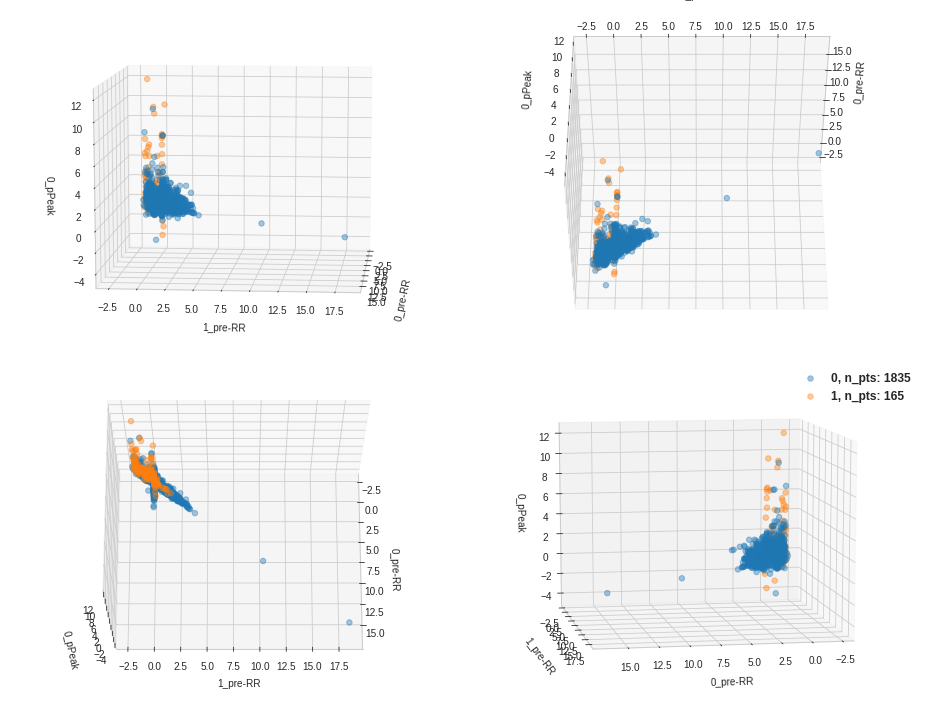

In [ ]:
ml.fn_plot_3d_clf(df_tr.sample(2000))

- Above plot is about 3D plot of Top 3 features.
- Using this plot also, we can't create simple decision based model since points of both classes can't be classified where all points looks like cumbersome.

**Logistic Regression**

- Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables.
- In logistic regression the dependent variable is always binary.
- Logistic regression is mainly used to for prediction and also calculating the probability of success.
- In logistic regression, main assumption is to consider all points are almost linearly separable.

In [ ]:
param_grid_ = dict(penalty = ['l2', 'l1'], 
                   class_weight = ["balanced"],
                            C = [1e-7,10000000000],
                       solver = ['saga'],
                     max_iter = [30_000],
                 random_state = [0])
param_grid = ml.fn_param_grid(param_grid_)

In [ ]:
for i in param_grid:
    print(i)
    print()

{'C': 1e-07, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}

{'C': 1e-07, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}

{'C': 10000000000, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}

{'C': 10000000000, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}



In [ ]:
from sklearn.linear_model import LogisticRegression

X_tr, y_tr = df_tr.iloc[:, :-1].values, df_tr.iloc[:, -1].values

model_class = LogisticRegression
trained_models = ml.fn_train_models(X_tr, y_tr, model_class, param_grid)

100% (4 of 4) |##########################| Elapsed Time: 0:00:20 Time:  0:00:20


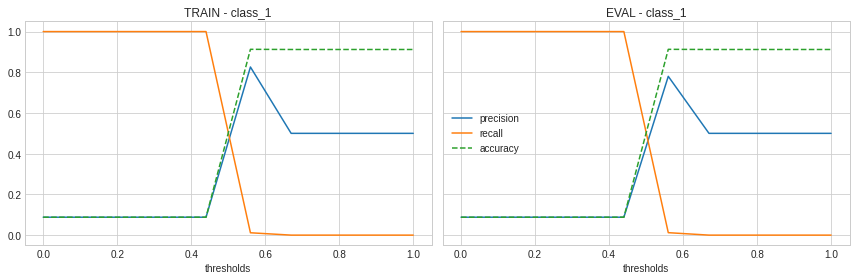

In [ ]:
model_n = 0

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9124048521863574


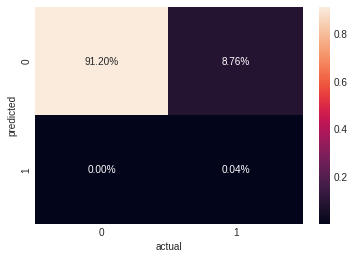

In [ ]:
th = 0.58
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

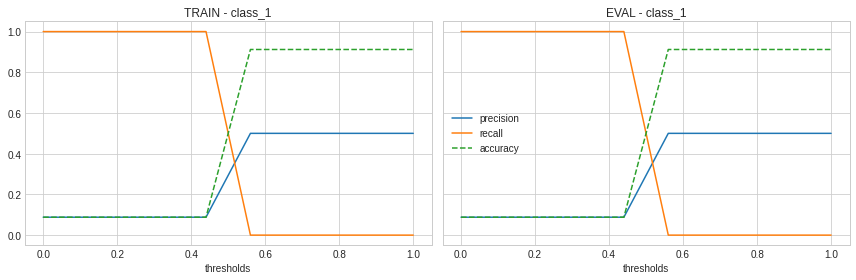

In [ ]:
model_n = 1

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9120104571039006


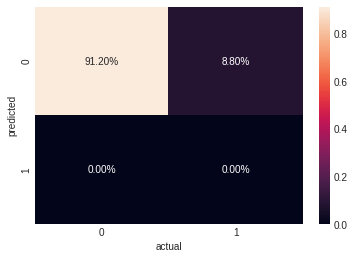

In [ ]:
th = 0.57
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

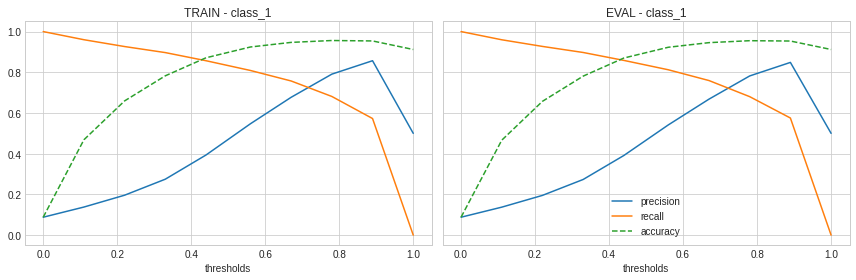

In [ ]:
model_n = 2
X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9518161893547133


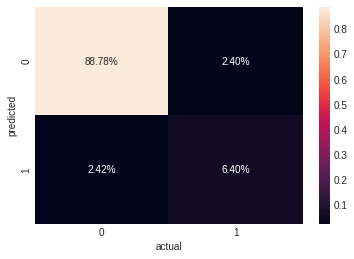

In [ ]:
th = 0.72
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

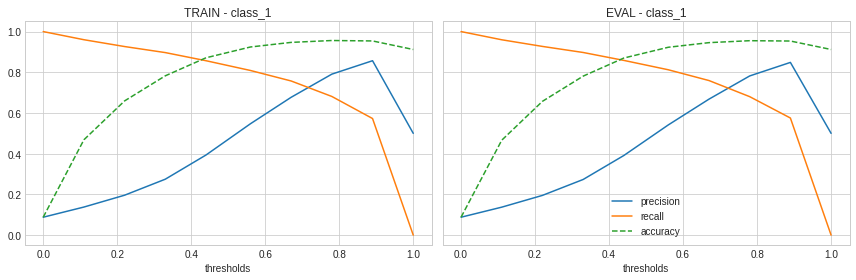

In [ ]:
model_n = 3

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9518161893547133


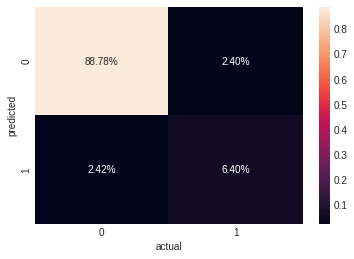

In [ ]:
th = 0.72
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

**Model Performance:**
- In Logistic regression, We trained the Logistic regression model with Hyperparameters C and penalty.
    - penalty = ['l2', 'l1']
    - C = [1e-7,10000000000]

- Hence, We came across the four combinations of parameters.
- We trained the Logistic Regression model on each set of parameters.
- Then we choose the best threshold value on each model on evaluation data and check the performance using performance metrics:
    - accuracy
    - precision
    - recall

- Hence, Best model:
    {'C': 10000000000, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}
- And Threshold Value : 0.72, above model 
    - accuracy: 0.9525542715804538
    - precision: 0.730900798
    - recall: 0.728409091

In [ ]:
best_log_model = trained_models[2]
filename = '/content/drive/MyDrive/Project AI ML/Data/logistic_regression_model.sav'
joblib.dump(best_log_model, filename)
log_threshold = 0.72
pickle.dump(log_threshold, open('/content/drive/MyDrive/Project AI ML/Data/log_threshold.pkl','wb'))

**Generalization on Chosen Best Logistic Regression Model**

In [ ]:
best_log_model = joblib.load('/content/drive/MyDrive/Project AI ML/Data/logistic_regression_model.sav')
log_threshold = pickle.load(open('/content/drive/MyDrive/Project AI ML/Data/log_threshold.pkl','rb'))

In [ ]:
ml.fn_test_model_binary_clf(df_ts, best_log_model, threshold_class_1 = log_threshold)

--------------------
LOGLOSS : 0.3024
ACCURACY: 0.952
--------------------



,prec,rec
class_0,0.973,0.974
class_1,0.728,0.725


**Random Forest Model**

In [ ]:
from sklearn.model_selection import ParameterGrid

# Number of trees in random forest
n_estimators = [120,200]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [6,10,15]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5]
# Method of selecting samples for training each tree
bootstrap = [True]
class_weight = "balanced",
random_state = [0]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'class_weight' :class_weight,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state':random_state}
# print(random_grid)
param_grid = ml.fn_param_grid(random_grid)

In [ ]:
for i in param_grid:
    print(i)
    print()

{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 120, 'random_state': 0}

{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200, 'random_state': 0}

{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 120, 'random_state': 0}

{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200, 'random_state': 0}

{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 120, 'random_state': 0}

{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_

In [ ]:
#Random Forest hyper-parameter tuning
from sklearn.ensemble import RandomForestClassifier


X_tr, y_tr = df_tr.iloc[:, :-1].values, df_tr.iloc[:, -1].values

model_class = RandomForestClassifier
trained_models = ml.fn_train_models(X_tr, y_tr, model_class, param_grid)

100% (6 of 6) |##########################| Elapsed Time: 0:34:46 Time:  0:34:46


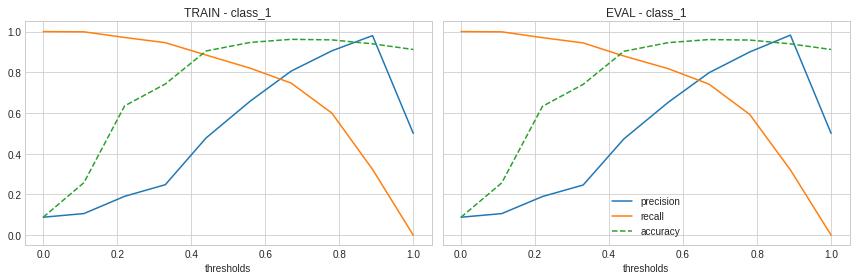

In [ ]:
model_n = 0

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9605266864615437


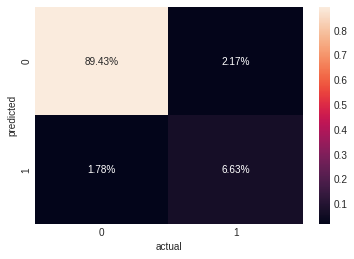

In [ ]:
th = 0.66
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

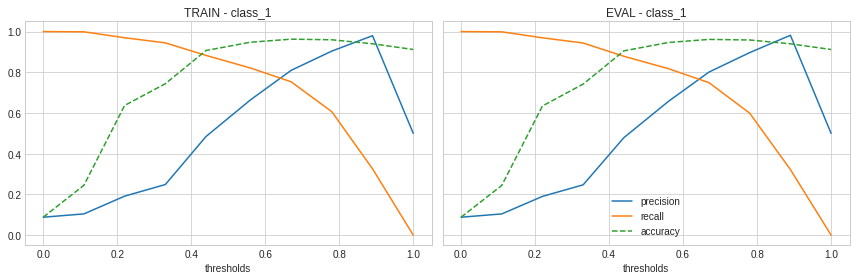

In [ ]:
model_n = 1

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9613999898584121


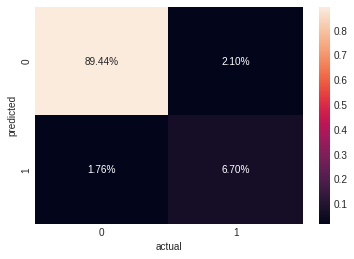

In [ ]:
th = 0.66
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

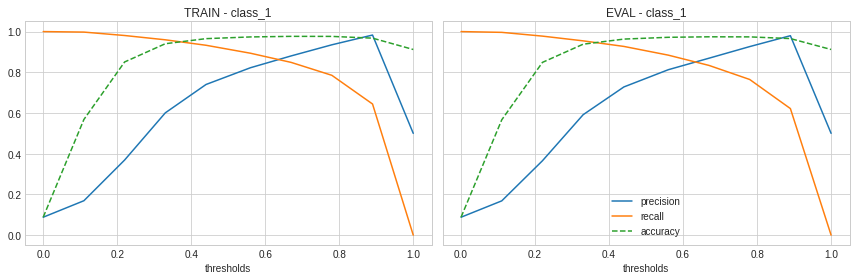

In [ ]:
model_n = 2

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9571405229678793


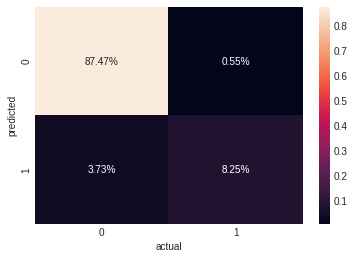

In [ ]:
th = 0.40
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

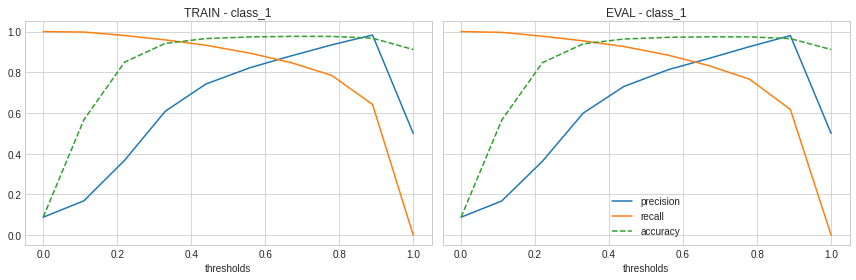

In [ ]:
model_n = 3

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9578447999008378


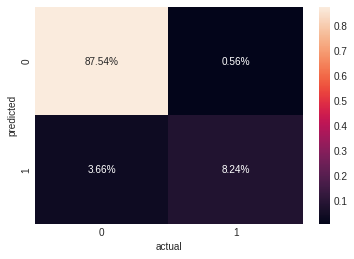

In [ ]:
th = 0.40
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

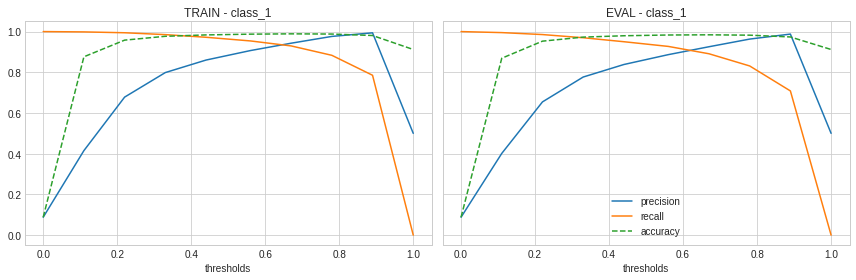

In [ ]:
model_n = 4

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9752094519598619


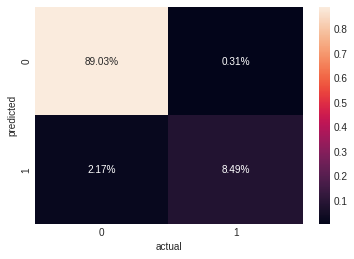

In [ ]:
th = 0.36
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

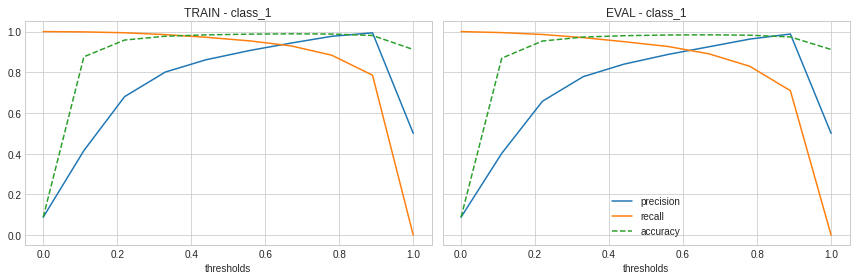

In [ ]:
model_n = 5

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9755418706722182


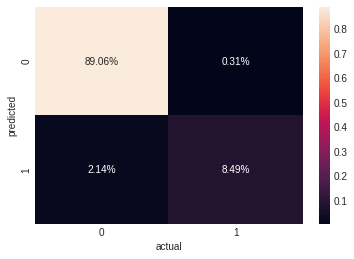

In [ ]:
th = 0.36
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

**Model Performance:**
- In Random Forest, We trained the Random Forest model with Hyperparameters max_depth and n_estimators.
    - n_estimators = [120,200]
    - max_depth = [6,10,15]

- Hence, We came across the six combinations of parameters.
- We trained the Random Forest model on each set of parameters.
- Then we choose the best threshold value on each model on evaluation data and check the performance using performance metrics:
    - accuracy
    - precision
    - recall

- Hence, Best model:
    {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 120, 'random_state': 0}

- And Threshold Value : 0.36, above model 
    - accuracy: 0.9752094519598619
    - precision: 0.798682973
    - recall: 0.964772727

In [ ]:
best_rf_model = trained_models[4]
filename = '/content/drive/MyDrive/Project AI ML/Data/random_forest_model.sav'
joblib.dump(best_rf_model, filename)
rf_threshold = 0.36
pickle.dump(rf_threshold, open('/content/drive/MyDrive/Project AI ML/Data/rf_threshold.pkl','wb'))

**Generalization on Best Chosen Random Forest Model**

In [ ]:
best_rf_model = joblib.load('/content/drive/MyDrive/Project AI ML/Data/random_forest_model.sav')
rf_threshold = pickle.load(open('/content/drive/MyDrive/Project AI ML/Data/rf_threshold.pkl','rb'))

In [ ]:
ml.fn_test_model_binary_clf(df_ts, best_rf_model, threshold_class_1 = rf_threshold)

--------------------
LOGLOSS : 0.0875
ACCURACY: 0.976
--------------------



,prec,rec
class_0,0.997,0.976
class_1,0.798,0.968


**Gradient Boost Tree Models**

**Gradient Boosting Classifier**

****

In [ ]:
# Number of trees in random forest
n_estimators = [120,200]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [6,10,15]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5]

class_weight = "balanced",
random_state = [0]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               
               'random_state':random_state}
# print(random_grid)
param_grid = ml.fn_param_grid(random_grid)

In [ ]:
for i in param_grid:
    print(i)
    print()

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 120, 'random_state': 0}

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200, 'random_state': 0}

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 120, 'random_state': 0}

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200, 'random_state': 0}

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 120, 'random_state': 0}

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200, 'random_state': 0}



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


X_tr, y_tr = df_tr.iloc[:, :-1].values, df_tr.iloc[:, -1].values

model_class = GradientBoostingClassifier
trained_models = ml.fn_train_models(X_tr, y_tr, model_class, param_grid)

100% (6 of 6) |##########################| Elapsed Time: 0:58:32 Time:  0:58:32


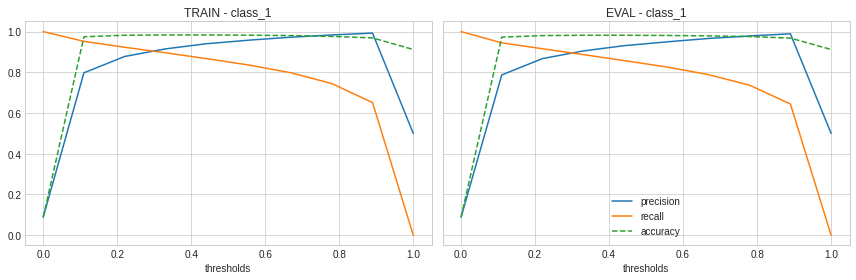

In [ ]:
model_n = 0

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9710119614394294


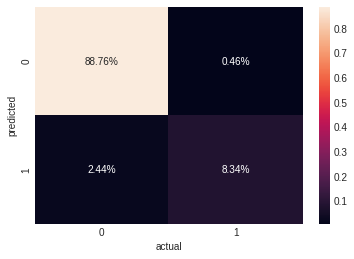

In [ ]:
th = 0.10
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

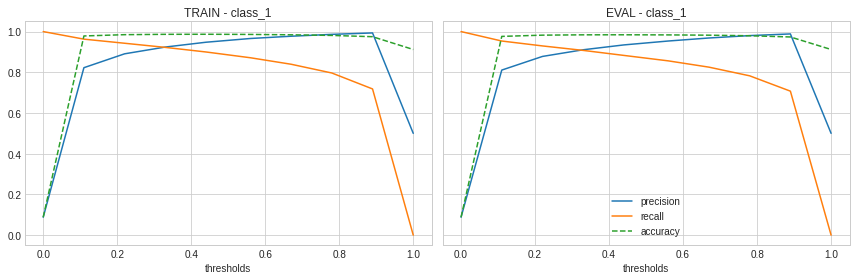

In [ ]:
model_n = 1

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9751418413742978


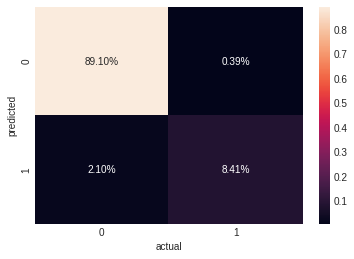

In [ ]:
th = 0.10
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

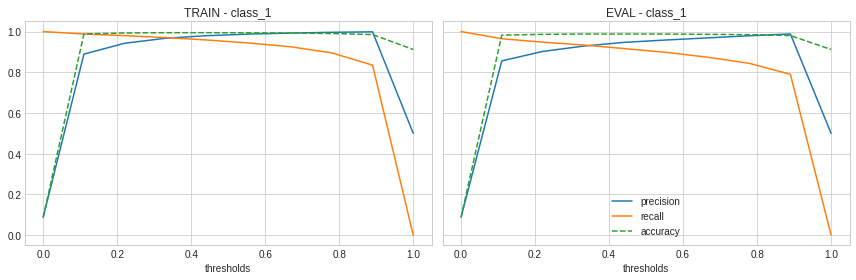

In [ ]:
model_n = 2

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9816831655276161


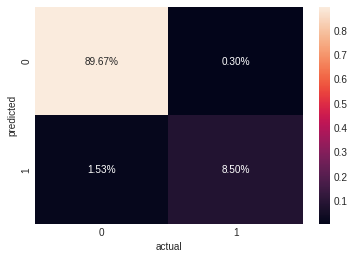

In [ ]:
th = 0.10
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

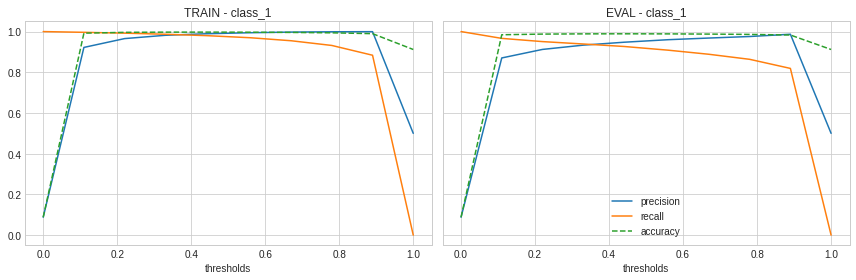

In [ ]:
model_n = 3

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9838861437739101


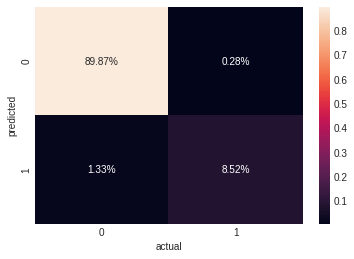

In [ ]:
th = 0.10
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

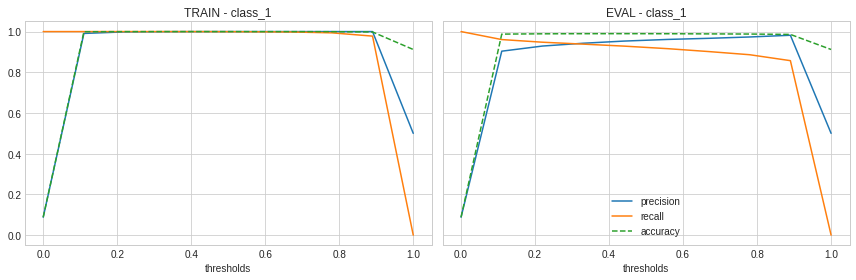

In [ ]:
model_n = 4

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9873511862840659


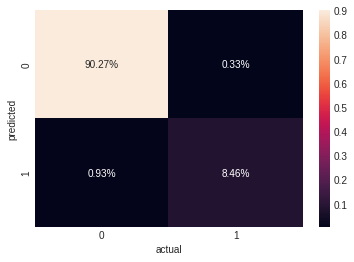

In [ ]:
th = 0.10
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

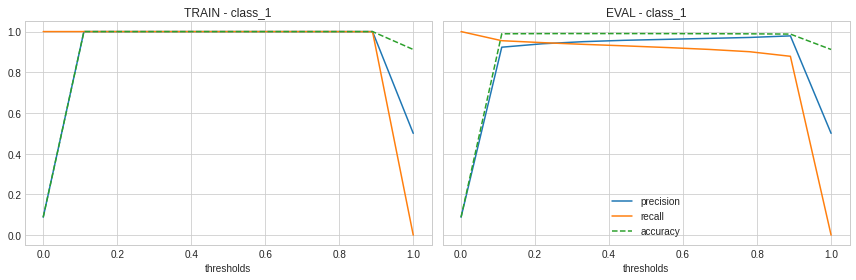

In [ ]:
model_n = 5

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9889456692602838


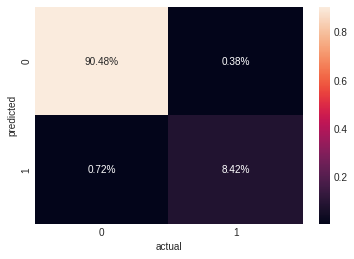

In [ ]:
th = 0.10
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

**Model Performance:**
- In Gradient Boosting Classifier, We trained the Gradient Boosting model with Hyperparameters max_depth and n_estimators.
    - n_estimators = [120,200]
    - max_depth = [6,10,15]

- Hence, We came across the six combinations of parameters.
- We trained the Gradient Boosting model on each set of parameters.
- Then we choose the best threshold value on each model on evaluation data and check the performance using performance metrics:
    - accuracy
    - precision
    - recall

- Hence, Best model:
    {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200, 'random_state': 0}
- And Threshold Value : 0.10, above model 
    - accuracy: 0.9889456692602838
    - precision: 0.921225383
    - recall: 0.956818182

In [ ]:
best_gb_model = trained_models[5]
filename = '/content/drive/MyDrive/Project AI ML/Data/gradient_boosting_model.sav'
joblib.dump(best_gb_model, filename)
gb_threshold = 0.10
pickle.dump(gb_threshold, open('/content/drive/MyDrive/Project AI ML/Data/gb_threshold.pkl','wb'))

**Generalization on Best Chosen Gradient Boosting Model**

In [ ]:
best_gb_model = joblib.load('/content/drive/MyDrive/Project AI ML/Data/gradient_boosting_model.sav')
gb_threshold = pickle.load(open('/content/drive/MyDrive/Project AI ML/Data/gb_threshold.pkl','rb'))

In [ ]:
ml.fn_test_model_binary_clf(df_ts, best_gb_model, threshold_class_1 = gb_threshold)

--------------------
LOGLOSS : 0.0352
ACCURACY: 0.99
--------------------



,prec,rec
class_0,0.996,0.992
class_1,0.925,0.962


**Adaptive Boosting Classifier**

In [ ]:
n_estimators = [120,200]

learning_rate=[0.08,0.20,0.80]
# class_weight = "balanced",
random_state = [0]
random_grid_adaboost = {'n_estimators': n_estimators,
              #  'class_weight' :class_weight,
               'learning_rate':learning_rate,
               
               'random_state':random_state}
# print(random_grid)
param_grid = ml.fn_param_grid(random_grid_adaboost)

In [ ]:
for i in param_grid:
    print(i)
    print()

{'learning_rate': 0.08, 'n_estimators': 120, 'random_state': 0}

{'learning_rate': 0.08, 'n_estimators': 200, 'random_state': 0}

{'learning_rate': 0.2, 'n_estimators': 120, 'random_state': 0}

{'learning_rate': 0.2, 'n_estimators': 200, 'random_state': 0}

{'learning_rate': 0.8, 'n_estimators': 120, 'random_state': 0}

{'learning_rate': 0.8, 'n_estimators': 200, 'random_state': 0}



In [ ]:
from sklearn.ensemble import AdaBoostClassifier


X_tr, y_tr = df_tr.iloc[:, :-1].values, df_tr.iloc[:, -1].values

model_class = AdaBoostClassifier
trained_models = ml.fn_train_models(X_tr, y_tr, model_class, param_grid)

100% (6 of 6) |##########################| Elapsed Time: 0:37:46 Time:  0:37:46


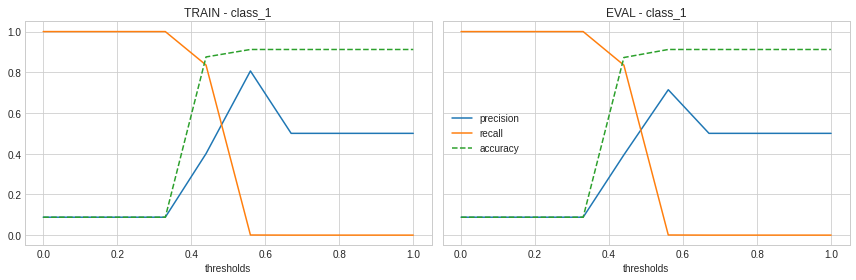

In [ ]:
model_n = 0

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9105568295142743


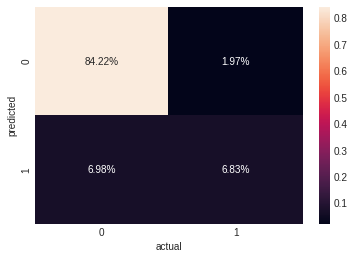

In [ ]:
th = 0.45
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

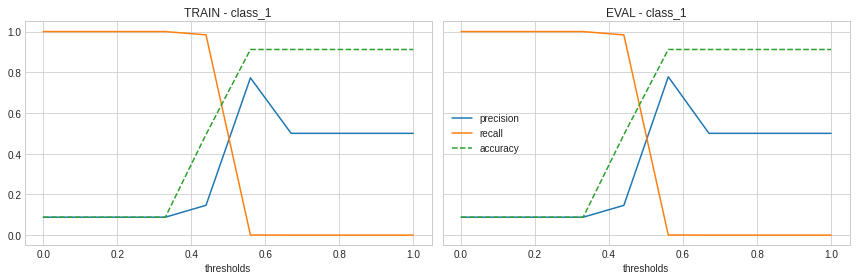

In [ ]:
model_n = 1

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9395561365057723


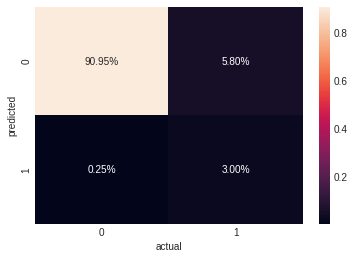

In [ ]:
th = 0.5
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

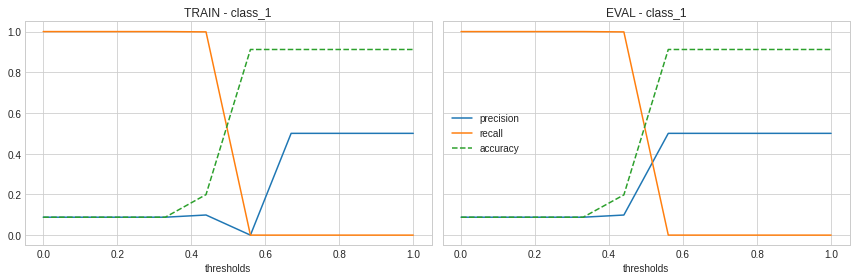

In [ ]:
model_n = 2

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9464073425095922


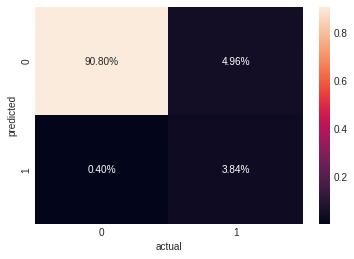

In [ ]:
th = 0.5
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

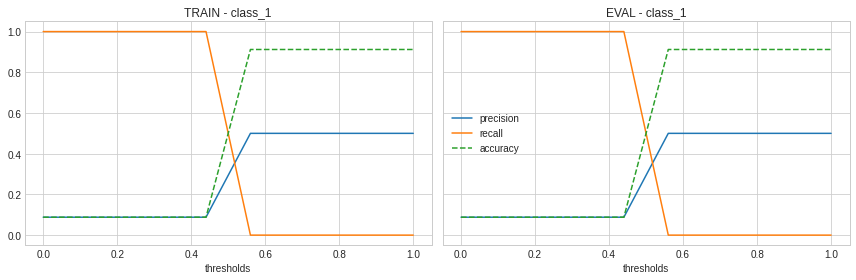

In [ ]:
model_n = 3

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9518612630784227


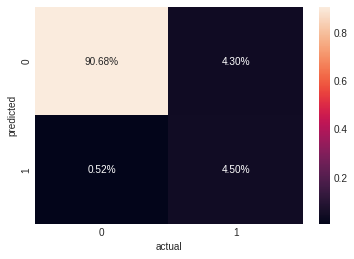

In [ ]:
th = 0.5
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

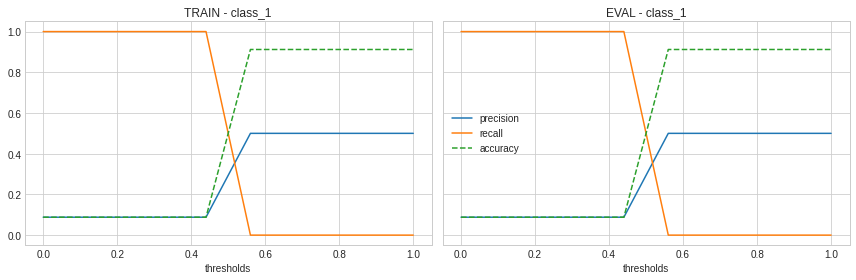

In [ ]:
model_n = 4

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9582110239059762


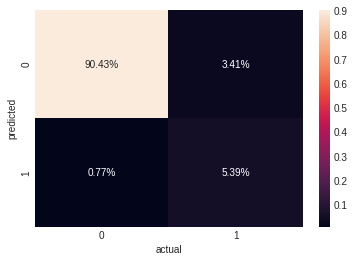

In [ ]:
th = 0.5
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

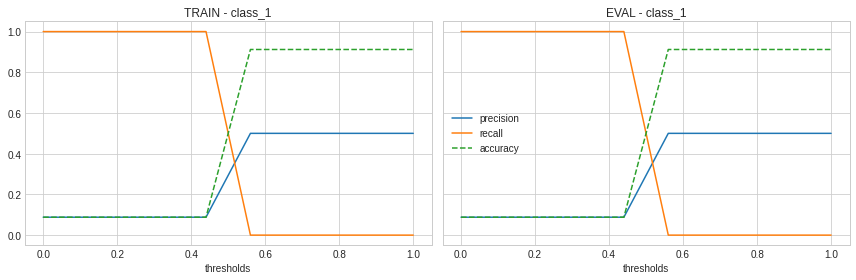

In [ ]:
model_n = 5

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9610901080079104


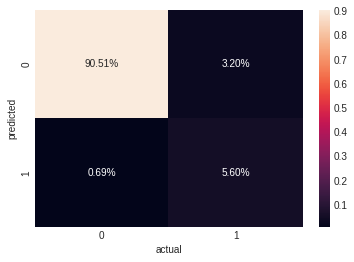

In [ ]:
th = 0.5
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

**Model Performance:**
- In Adaptive Boosting Classifier, We trained the Adaptive Boosting model with Hyperparameters learning_rate and n_estimators.
    - n_estimators = [120,200]
    - learning_rate = [0.08,0.20,0.80]

- Hence, We came across the six combinations of parameters.
- We trained the Adaptive Boosting model on each set of parameters.
- Then we choose the best threshold value on each model on evaluation data and check the performance using performance metrics:
    - accuracy
    - precision
    - recall

- Hence, Best model:
    {'learning_rate': 0.8, 'n_estimators': 200, 'random_state': 0}
- And Threshold Value : 0.50, above model 
    - accuracy: 0.9610901080079104
    - precision: 0.890302067
    - recall: 0.636363636

In [ ]:
best_ab_model = trained_models[5]
filename = '/content/drive/MyDrive/Project AI ML/Data/adaptive_boosting_model.sav'
joblib.dump(best_ab_model, filename)
ab_threshold = 0.50
pickle.dump(ab_threshold, open('/content/drive/MyDrive/Project AI ML/Data/ab_threshold.pkl','wb'))

**Generalization on Best Chosen Adaptive Boosting Model**

In [ ]:
best_ab_model = joblib.load('/content/drive/MyDrive/Project AI ML/Data/adaptive_boosting_model.sav')
ab_threshold = pickle.load(open('/content/drive/MyDrive/Project AI ML/Data/ab_threshold.pkl','rb'))

In [ ]:
ml.fn_test_model_binary_clf(df_ts, best_ab_model, threshold_class_1 = ab_threshold)

--------------------
LOGLOSS : 0.6786
ACCURACY: 0.961
--------------------



,prec,rec
class_0,0.966,0.993
class_1,0.896,0.635


**XG Boost**

In [ ]:

n_estimators = [120]



max_depth = [6,10,15]

learning_rate=[0.08,0.20,0.80]
class_weight = "balanced",
random_state = [0]
subsample = [0.6]
colsample_bytree = [0.8]
random_grid_xgboost = {'n_estimators': n_estimators,
               'class_weight' :class_weight,
               'learning_rate':learning_rate,
                'subsample': subsample,
                'colsample_bytree':colsample_bytree,
               'max_depth': max_depth,
               
               'random_state':random_state}
# print(random_grid)
param_grid = ml.fn_param_grid(random_grid_xgboost)

In [ ]:
for i in param_grid:
    print(i)
    print()

{'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 120, 'random_state': 0, 'subsample': 0.6}

{'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 120, 'random_state': 0, 'subsample': 0.6}

{'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 15, 'n_estimators': 120, 'random_state': 0, 'subsample': 0.6}

{'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 120, 'random_state': 0, 'subsample': 0.6}

{'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 120, 'random_state': 0, 'subsample': 0.6}

{'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 120, 'random_state': 0, 'subsample': 0.6}

{'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.8, 'max_depth'

In [ ]:
from xgboost import XGBClassifier

my_model = XGBClassifier

X_tr, y_tr = df_tr.iloc[:, :-1].values, df_tr.iloc[:, -1].values
trained_models = ml.fn_train_models(X_tr, y_tr, my_model, param_grid)

100% (9 of 9) |##########################| Elapsed Time: 1:00:47 Time:  1:00:47


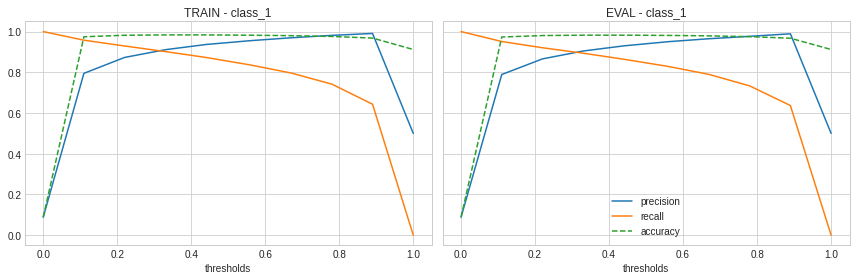

In [ ]:
model_n = 0

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9820888290410001


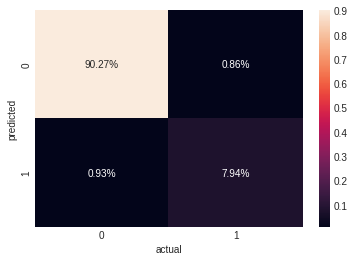

In [ ]:
th = 0.30
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

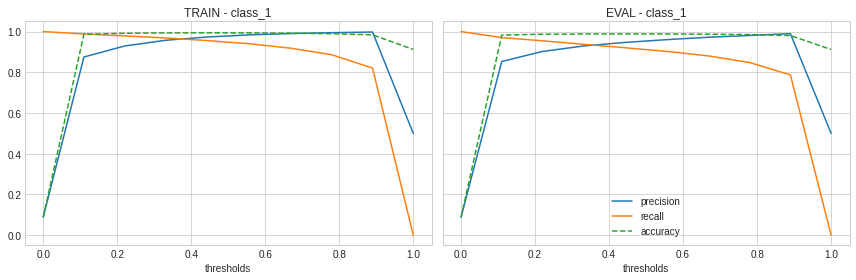

In [ ]:
model_n = 1

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9884047845757717


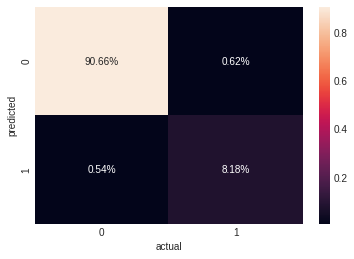

In [ ]:
th = 0.38
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

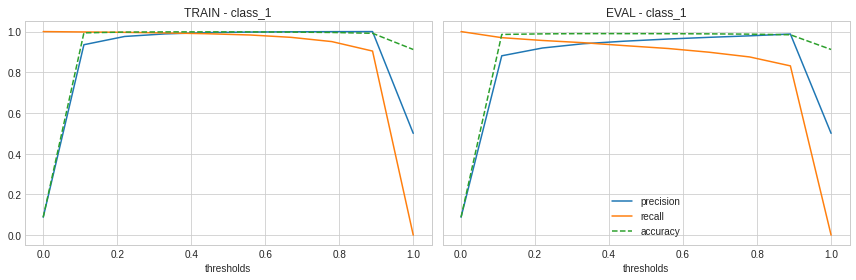

In [ ]:
model_n = 2

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9899485596128167


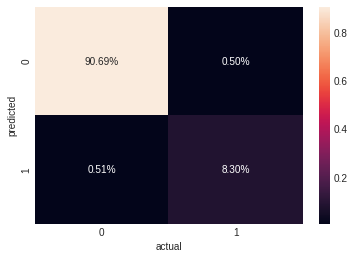

In [ ]:
th = 0.35
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

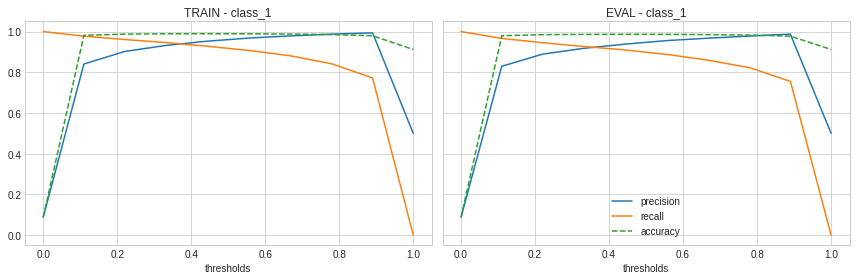

In [ ]:
model_n = 3

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.986686348859353


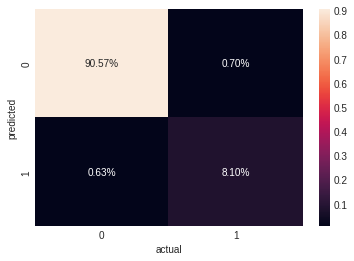

In [ ]:
th = 0.38
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

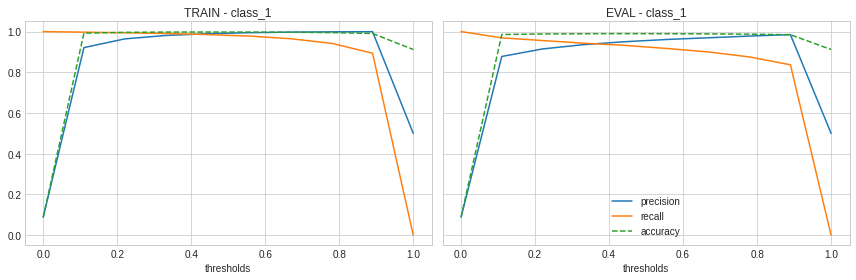

In [ ]:
model_n = 4

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9895767013922147


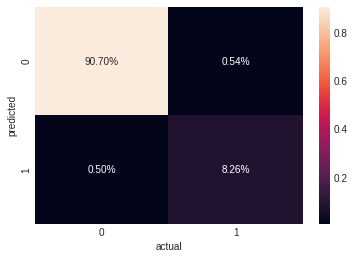

In [ ]:
th = 0.38
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

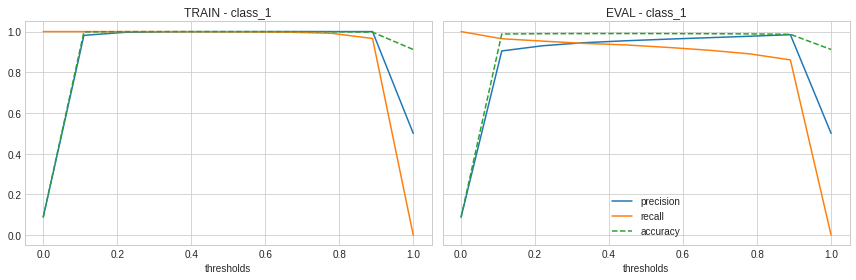

In [ ]:
model_n = 5

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9901964650932181


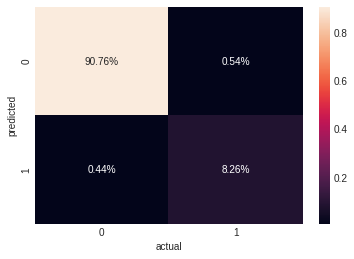

In [ ]:
th = 0.37
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

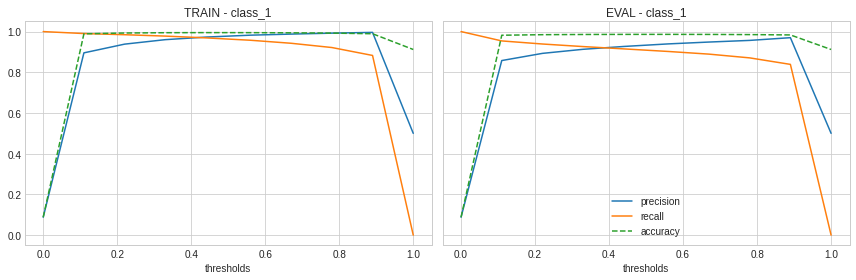

In [ ]:
model_n = 6

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9859595350645399


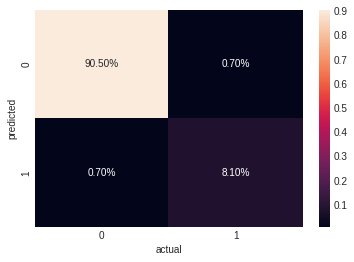

In [ ]:
th = 0.39
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

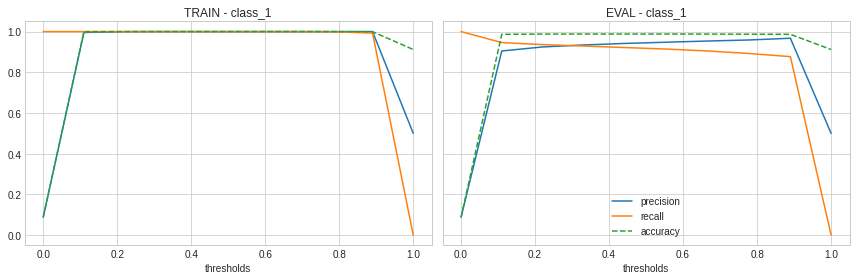

In [ ]:
model_n = 7

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9878864367531143


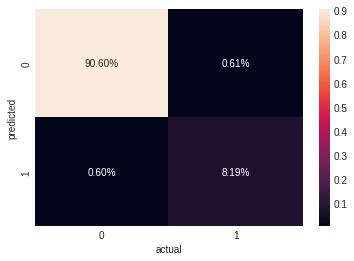

In [ ]:
th = 0.3
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

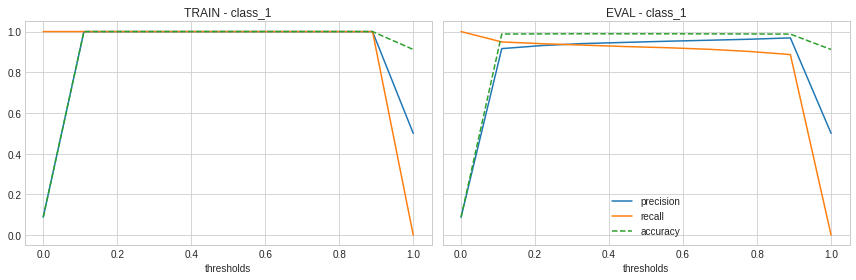

In [ ]:
model_n = 8

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

Accuracy is:  0.9889005955365745


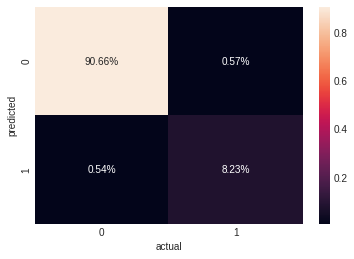

In [ ]:
th = 0.29
y_eval_pred = np.array([1 if ele >= th else 0 for ele in y_eval_proba])
ac = accuracy_score(y_eval,y_eval_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_eval,y_eval_pred)

sns.heatmap(cm.T/np.sum(cm),annot=True,fmt=".2%")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

**Model Performance:**
- In XG Boosting Classifier, We trained the XG Boosting model with Hyperparameters max_depth and n_estimators.
    - learning_rate = [0.08,0.20,0.80]
    - max_depth = [6,10,15]

- Hence, We came across the six combinations of parameters.
- We trained the XG Boosting model on each set of parameters.
- Then we choose the best threshold value on each model on evaluation data and check the performance using performance metrics:
    - accuracy
    - precision
    - recall

- Hence, Best model:
    {'class_weight': 'balanced', 'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 120, 'random_state': 0, 'subsample': 0.6}

- And Threshold Value : 0.37, above model 
    - accuracy: 0.9901964650932181
    - precision: 0.949425287
    - recall: 0.938636364

In [ ]:
best_xg_model = trained_models[5]
filename = '/content/drive/MyDrive/Project AI ML/Data/xg_boosting_model.sav'
joblib.dump(best_xg_model, filename)
xg_threshold = 0.37
pickle.dump(xg_threshold, open('/content/drive/MyDrive/Project AI ML/Data/xg_threshold.pkl','wb'))

**Generalization on Best Chosen XG Boosting Model**

In [ ]:
best_xg_model = joblib.load('/content/drive/MyDrive/Project AI ML/Data/xg_boosting_model.sav')
xg_threshold = pickle.load(open('/content/drive/MyDrive/Project AI ML/Data/xg_threshold.pkl','rb'))

In [ ]:
ml.fn_test_model_binary_clf(df_ts, best_xg_model, threshold_class_1 = xg_threshold)

--------------------
LOGLOSS : 0.0277
ACCURACY: 0.991
--------------------



,prec,rec
class_0,0.995,0.995
class_1,0.950,0.944


**Comparision Between All Models**

In [ ]:
cv_result = [0.9525542715804538,0.9752094519598619,0.9889456692602838,0.9610901080079104,0.9901964650932181]
thresholds = [0.72,0.36,0.10,0.50,0.37]

Text(0.5, 1.0, 'Validation Scores')

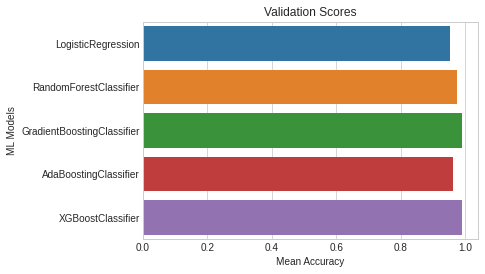

In [ ]:
cv_results = pd.DataFrame({"Validation Accuracy":cv_result, "Thresholds": thresholds, "ML Models":["LogisticRegression", "RandomForestClassifier",
             "GradientBoostingClassifier",
             "AdaBoostingClassifier",
             "XGBoostClassifier"]})

g = sns.barplot("Validation Accuracy", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Validation Scores")

**Comparison of All Models:**

- For this problem: Arrhythmia classification, we should focus on the positive class that determines whether this positive class is detected accurately or not.
  - I.e., If the patient is having a heart attack, he should be detected positively for further medical procedures. Hence, for class_1, precision should be high and also recall should be high.
  - And also, If the patient didn’t have a heart attack, he can be predicted as a positive class. Then also It won’t be that much of a problem.

	

- So, From above plot, It is clear that XG boost and Gradient Boosting Algorithms have pretty good accuracy.
- And also, the precision and recall of both models is also high.
